In [ ]:
import os
import numpy as np
import pandas as pd
from model_training.cnn_classifier import CNNClassifier
from model_training.architectures.simple_convolution_network import SimpleConvolutionArchitecture
from data_preprocessing.spectrogram_eda import plot_acc_per_class , plot_clc_acc_per_class


from model_training.measures import summary, get_true_and_predicted_labels

In [ ]:
DATASET_NAME = "tsrc_spectrograms"
DATASET_PATH = f"../data/{DATASET_NAME}"
FOLDER_PATH = f"../models/simple_cnn_{DATASET_NAME}"

CLEAN_DATASET_NAME = "tsrc_spectrograms_cleaned"
CLEAN_DATASET_PATH = f"../data/{CLEAN_DATASET_NAME}"
CLEAN_FOLDER_PATH = f"../models/simple_cnn_{CLEAN_DATASET_NAME}"


ARCHITRECTURE = SimpleConvolutionArchitecture()
CLASS_LABELS = os.listdir(f'{DATASET_PATH}/train')

model = CNNClassifier(FOLDER_PATH, architecture=ARCHITRECTURE)
model_clean = CNNClassifier(CLEAN_FOLDER_PATH, architecture=ARCHITRECTURE)

In [ ]:
model.fit(
    f"{DATASET_PATH}/train", 
    f"{DATASET_PATH}/validation",
    batch_size=32,
    n_epochs=6,
)

In [ ]:
model_clean.fit(
    f"{CLEAN_DATASET_PATH}/train", 
    f"{CLEAN_DATASET_PATH}/validation",
    batch_size=32,
    n_epochs=6,
)

c:\Users\Janek\Documents\Studia\MINI\sem5\IML\Pro\Wer_4.0\intro-to-ml-master\venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Running training on CPU...


 17%|█▋        | 1/6 [09:34<47:50, 574.04s/it]

Epoch 0 Done after 574.0422718524933 seconds


 33%|███▎      | 2/6 [18:32<36:51, 552.98s/it]

Epoch 1 Done after 538.2285068035126 seconds


 50%|█████     | 3/6 [27:26<27:13, 544.37s/it]

Epoch 2 Done after 534.1284809112549 seconds


 67%|██████▋   | 4/6 [36:24<18:03, 541.82s/it]

Epoch 3 Done after 537.8973956108093 seconds


 83%|████████▎ | 5/6 [45:19<08:59, 539.53s/it]

Epoch 4 Done after 535.4678971767426 seconds


100%|██████████| 6/6 [54:15<00:00, 542.58s/it]

Epoch 5 Done after 535.7012712955475 seconds
Finished Training


In [6]:
y_true, y_pred = get_true_and_predicted_labels(model, f"{DATASET_PATH}/test")

In [7]:
df = pd.DataFrame({'y_true' : y_true, "y_pred" : y_pred })
df.to_csv(f"{FOLDER_PATH}/predictions.csv", index=False)

In [ ]:
y_true_clean, y_pred_clean = get_true_and_predicted_labels(model, f"{CLEAN_DATASET_PATH}/test")

In [ ]:
df = pd.DataFrame({'y_true' : y_true_clean, "y_pred" : y_pred_clean })
df.to_csv(f"{CLEAN_FOLDER_PATH}/predictions.csv", index=False)

Accuracy: 0.805656160900054
Micro F1 Score: 0.8056561609000539
Macro F1 Score: 0.8086897691638334
Weighted F1 Score: 0.8077260888487977


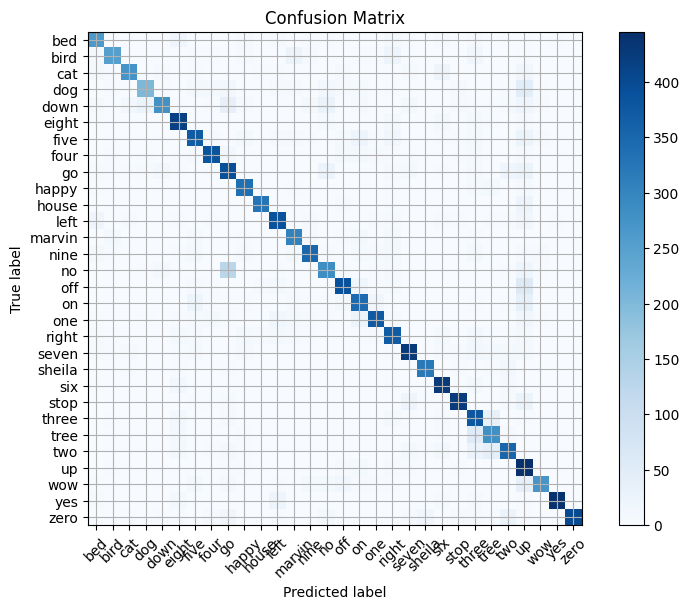

In [4]:
df = pd.read_csv(f"{FOLDER_PATH}/predictions.csv")
y_true = df["y_true"].values
y_pred = df["y_pred"].values
summary = summary(y_true, y_pred, CLASS_LABELS)

Accuracy: 0.821870845868607
Micro F1 Score: 0.821870845868607
Macro F1 Score: 0.8249070920535935
Weighted F1 Score: 0.8232024957105616


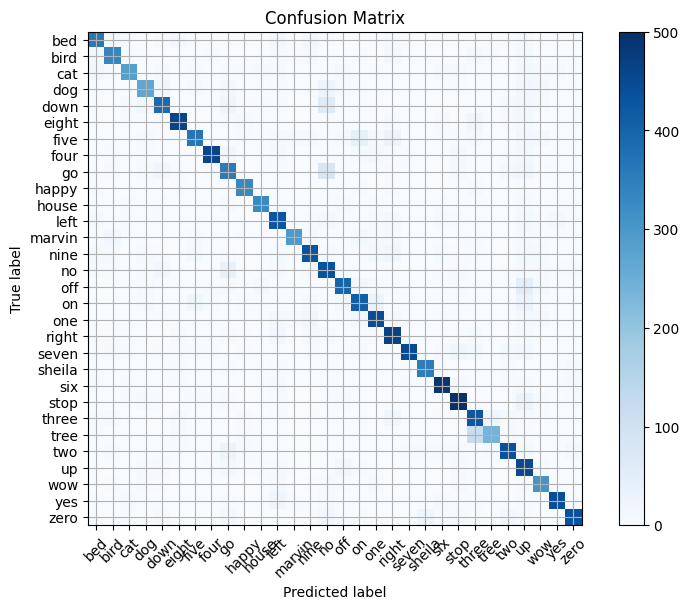

In [3]:
df = pd.read_csv(f"{CLEAN_FOLDER_PATH}/predictions.csv")
y_true_clean = df["y_true"].values
y_pred_clean = df["y_pred"].values
summary(y_true_clean, y_pred_clean, CLASS_LABELS)

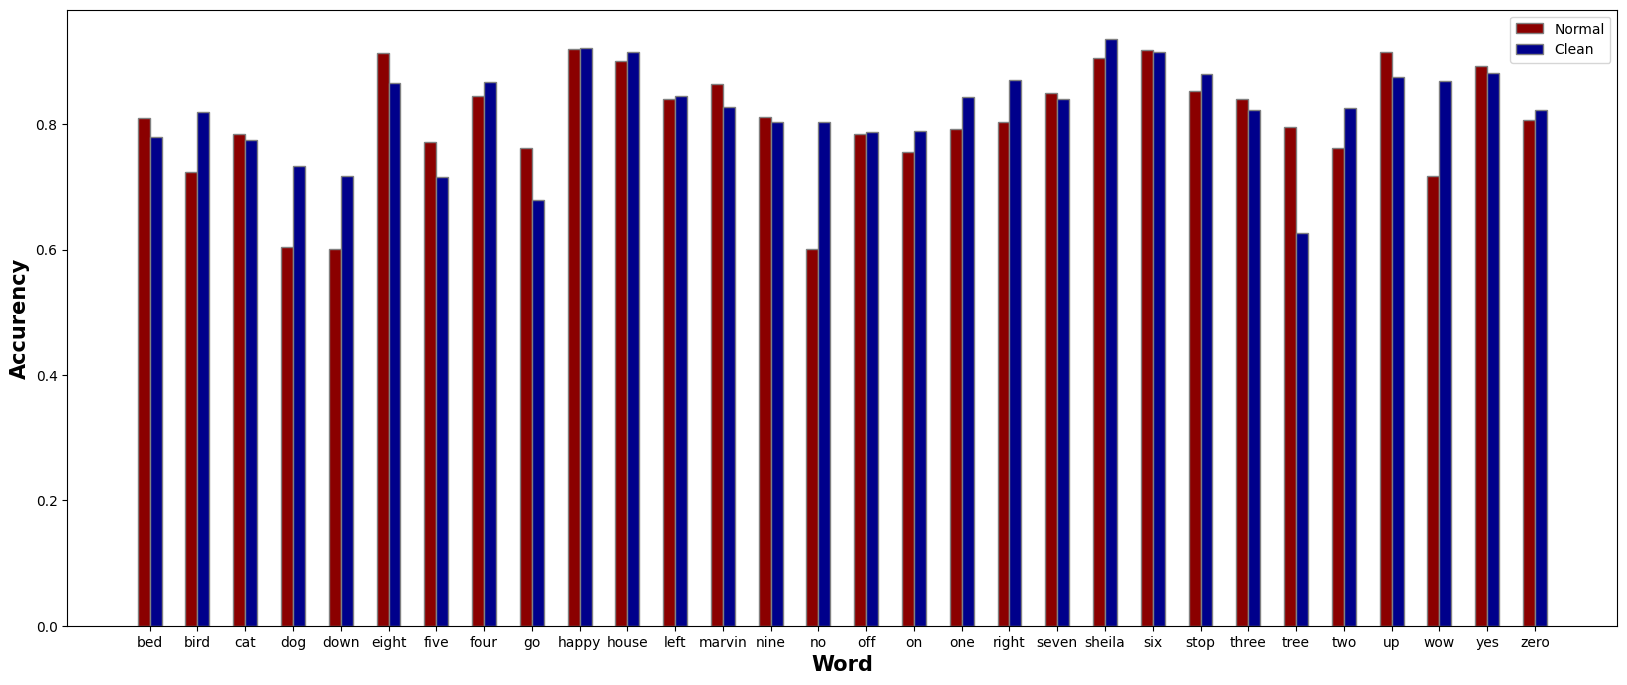

In [6]:
plot_acc_per_class(y_true , y_pred , y_true_clean , y_pred_clean)

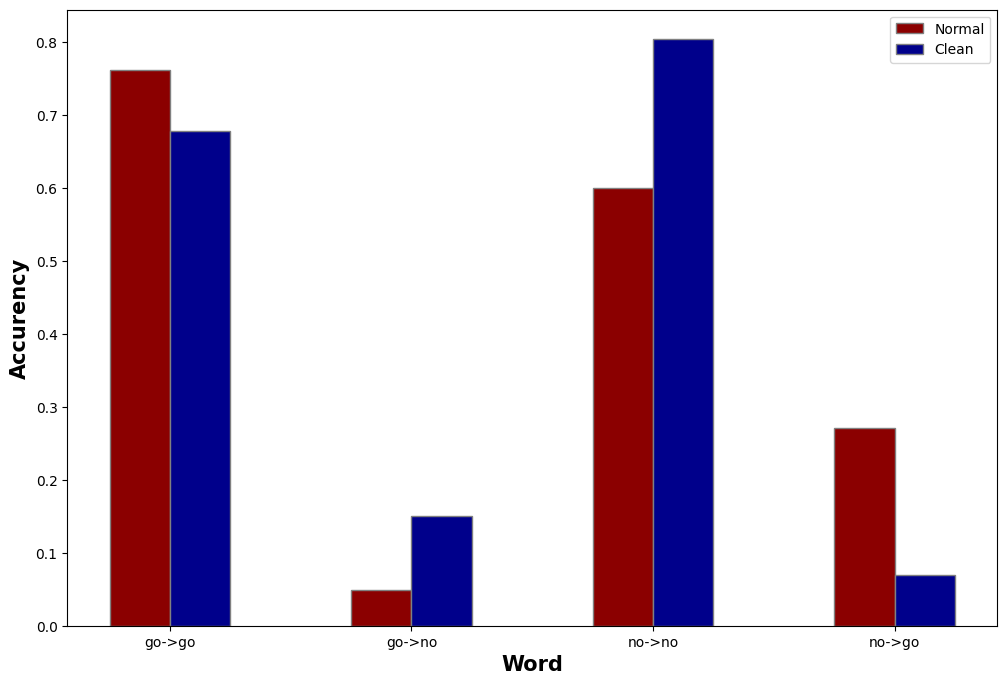

In [ ]:
class1 = "go"
class2 = "no"

plot_clc_acc_per_class(y_true , y_pred , y_true_clean , y_pred_clean , class1 , class2)

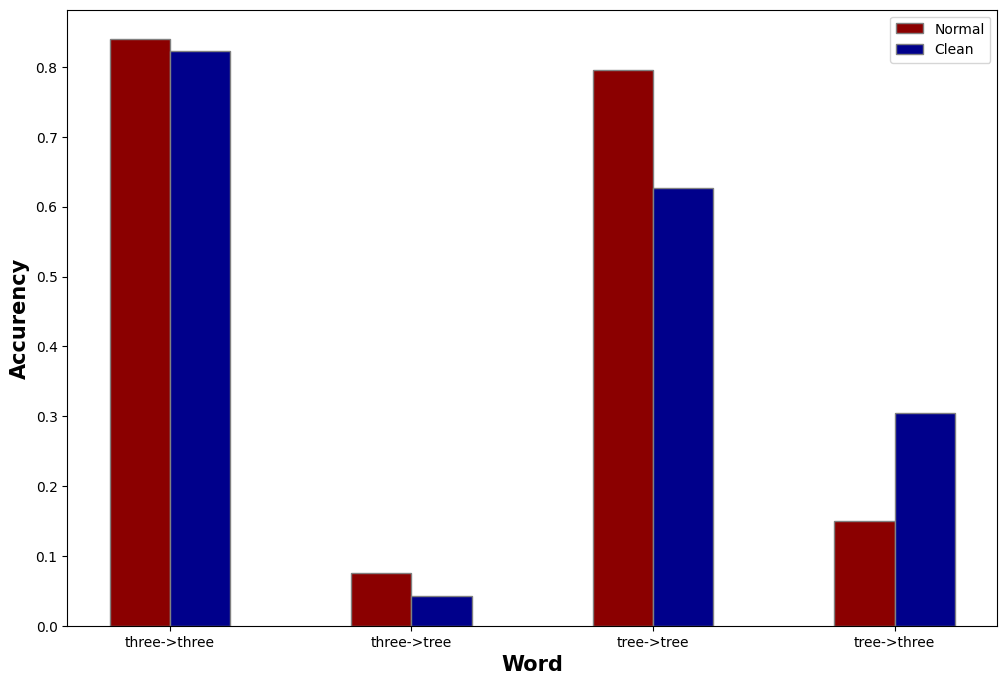

In [10]:
class1 = "three"
class2 = "tree"

plot_clc_acc_per_class(y_true , y_pred , y_true_clean , y_pred_clean , class1 , class2)

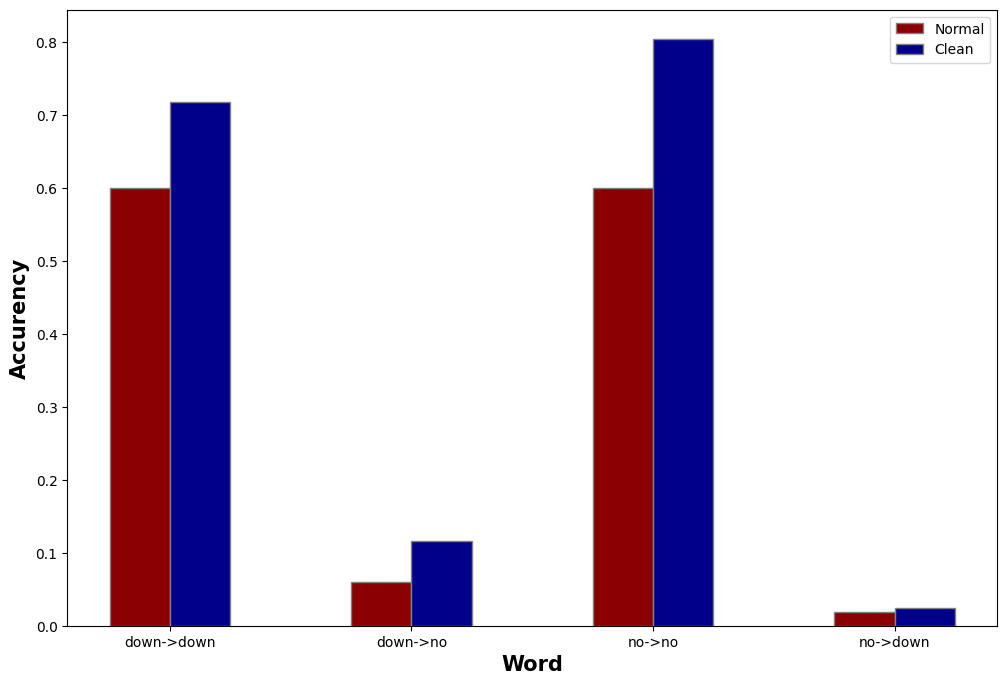

In [11]:
class1 = "down"
class2 = "no"

plot_clc_acc_per_class(y_true , y_pred , y_true_clean , y_pred_clean , class1 , class2)